Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html


In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

# Alternative to R in problems

Section 2.3.4 provides an intro to R in working with data.  This follows the same operations using familiar concepts in python and the ML_Table class, which is derived from Table.

In [2]:
raw_auto = ML_Table.read_table("./data/Auto.csv")
raw_auto

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu
15,8,350,165,"3,693",11.5,70,1,buick skylark 320
18,8,318,150,"3,436",11,70,1,plymouth satellite
16,8,304,150,"3,433",12,70,1,amc rebel sst
17,8,302,140,"3,449",10.5,70,1,ford torino
15,8,429,198,"4,341",10,70,1,ford galaxie 500
14,8,454,220,"4,354",9,70,1,chevrolet impala
14,8,440,215,"4,312",8.5,70,1,plymouth fury iii
14,8,455,225,"4,425",10,70,1,pontiac catalina
15,8,390,190,"3,850",8.5,70,1,amc ambassador dpl


In [3]:
# dimensions
raw_auto.num_rows, len(raw_auto)

(397, 9)

In [4]:
raw_auto.labels

('mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name')

In [5]:
raw_auto.where('horsepower', '?')

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
25,4,98,?,"2,046",19,71,1,ford pinto
21,6,200,?,"2,875",17,74,1,ford maverick
40.9,4,85,?,"1,835",17.3,80,2,renault lecar deluxe
23.6,4,140,?,"2,905",14.3,80,1,ford mustang cobra
34.5,4,100,?,"2,320",15.8,81,2,renault 18i


In [6]:
raw_auto.apply(type, 'horsepower')

array([<class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>,
       <class 'numpy.str_'>, <class 'numpy.str_'>, 

In [7]:
# cleaned table
auto = raw_auto.where(raw_auto['horsepower'] != '?')
auto['horsepower'] = auto.apply(int, 'horsepower')

In [8]:
auto.num_rows

392

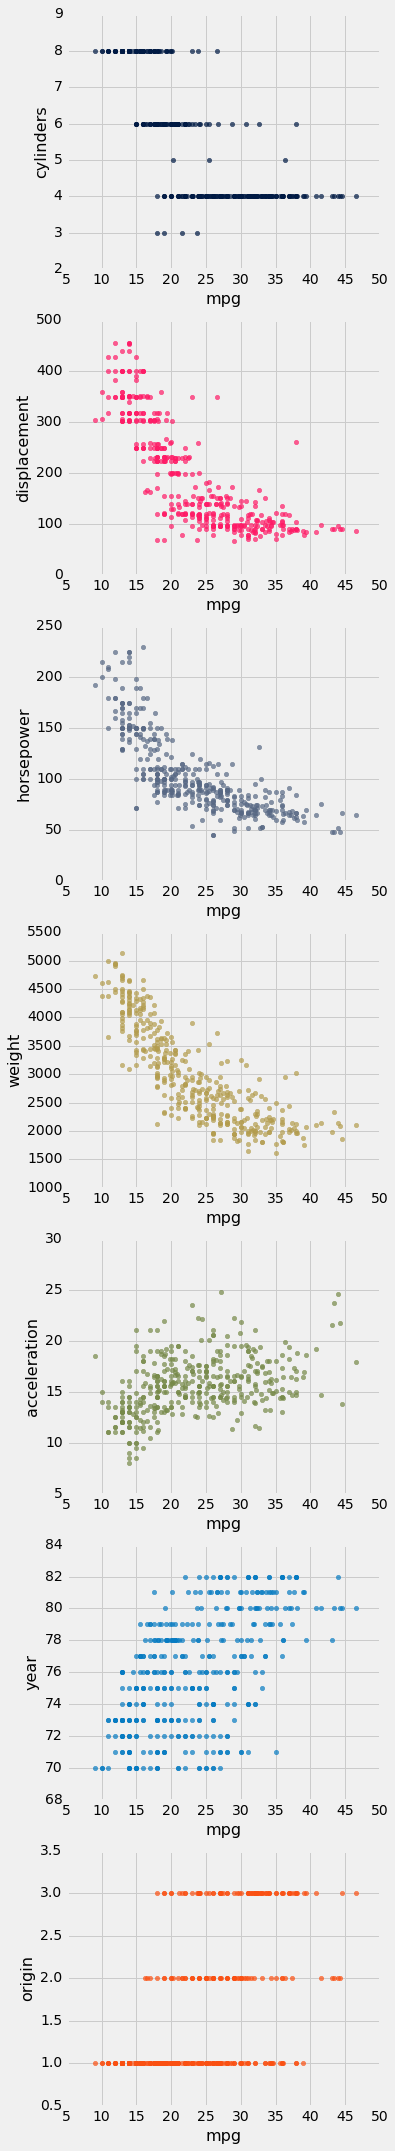

In [9]:
auto.drop('name').scatter('mpg', overlay=False)

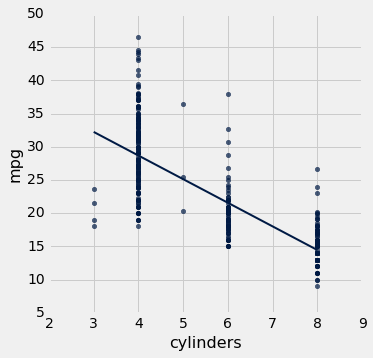

In [10]:
auto.select(['cylinders', 'mpg']).scatter('cylinders', fit_line=True)

In [11]:
auto.select(['mpg', 'cylinders']).group('cylinders')

cylinders,count
3,4
4,199
5,3
6,83
8,103


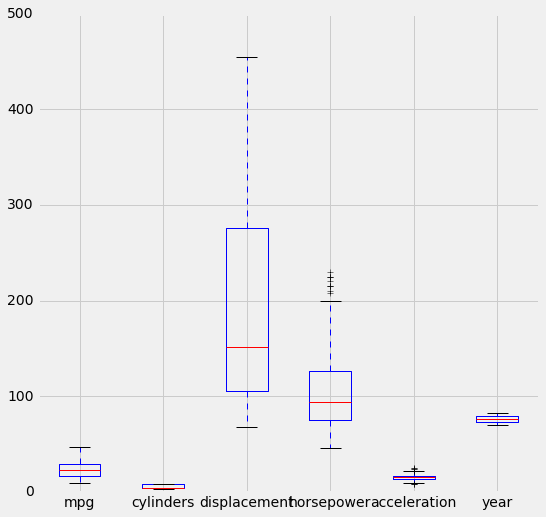

In [12]:
auto.drop(['name', 'weight', 'origin']).boxplot(width=8, height=8)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1151bc3c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115398128>], dtype=object)

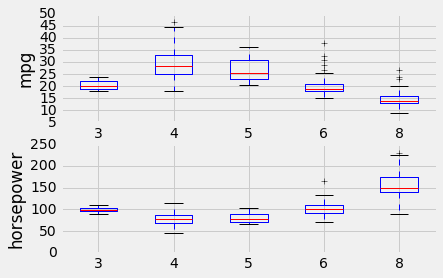

In [13]:
auto.select(['cylinders', 'mpg', 'horsepower']).boxplot('cylinders')

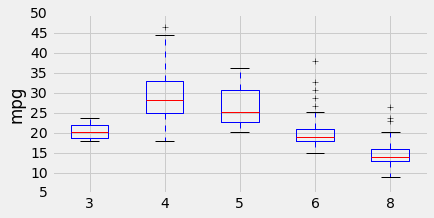

In [14]:
auto.select(['cylinders', 'mpg']).boxplot('cylinders', height=3)

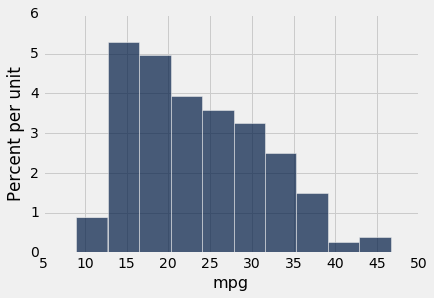

In [15]:
auto.select('mpg').hist()

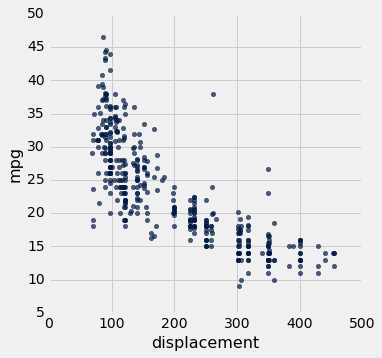

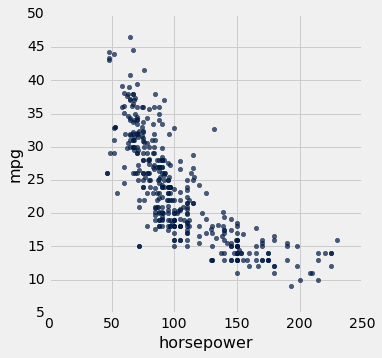

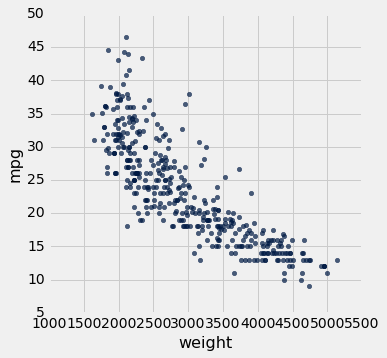

In [16]:
auto.scatter('displacement', select=['mpg'])
auto.scatter('horsepower', select=['mpg'])
auto.scatter('weight', select=['mpg'])

In [17]:
auto.stats()

statistic,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
min,9,3,68,46,1613,8,70,1,amc ambassador brougham
max,46.6,8,455,230,5140,24.8,82,3,vw rabbit custom
median,22.75,4,151,93.5,2803.5,15.5,76,1,
sum,9190.8,2145,76209.5,40952,1.16721e+06,6092.2,29784,618,


In [18]:
# Match R summary using the Table methods
def FirstQu(x):
    return np.percentile(x, 25)
def ThirdQu(x):
    return np.percentile(x, 5)
auto.stats(ops=[min, FirstQu, np.median, np.mean, ThirdQu, max])

statistic,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
min,9,3,68,46,1613,8,70,1,amc ambassador brougham
FirstQu,17,4,105,75,2225.25,13.775,73,1,
median,22.75,4,151,93.5,2803.5,15.5,76,1,
mean,23.4459,5.47194,194.412,104.469,2977.58,15.5413,75.9796,1.57653,
ThirdQu,13,4,85,60.55,1931.6,11.255,70,1,
max,46.6,8,455,230,5140,24.8,82,3,vw rabbit custom


In [19]:
# This is built in to ML_Table to more closely match R
auto.summary()

statistic,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
min,9,3,68,46,1613,8,70,1,amc ambassador brougham
FirstQu,17,4,105,75,2225.25,13.775,73,1,
median,22.75,4,151,93.5,2803.5,15.5,76,1,
mean,23.4459,5.47194,194.412,104.469,2977.58,15.5413,75.9796,1.57653,
ThirdQu,13,4,85,60.55,1931.6,11.255,70,1,
max,46.6,8,455,230,5140,24.8,82,3,vw rabbit custom
